<a href="https://colab.research.google.com/github/Tole01/Linear_algebra_ML/blob/main/Algebra_Lineal_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import sklearn.datasets
from PIL import Image 
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
#Funcion de Graficacion de vectores
def graficarVectores(vecs, cols, alpha = 1):

  # Coloreas los ejes
  plt.axvline(x = 0, color= 'grey', zorder = 0)
  plt.axhline(y = 0, color= 'grey', zorder = 0)

  # Iterador para cada punto del vector
  for i in range(len(vecs)):

    # Concatena los puntos de cada vector con el origen (0,0).  Esto genera un arreglo con 4 columnas
    x = np.concatenate([[0,0], vecs[i]])
    print(x)

    # Graficar el vector. Requiere todos los puntos, el angulo, las unidades de la escala, la escala, cuantos vectores se van a colorear y el alpha
    plt.quiver(x[0],
               x[1],
               x[2],
               x[3], angles = 'xy', scale_units = 'xy', 
               scale = 1, color = cols[i], alpha = alpha)

In [ ]:
def graficarMatriz(matriz, vectorCol = ['red', 'blue']):

  # Creamos los datos para graficar el circulo unitario con un arreglo de datos en X
  x = np.linspace(-1,1,100000)

  # Obtenermos cada coordenada de y
  y = np.sqrt(1-x**2)

  # Transformacion del circulo unitario a traves del producto punto con la matriz
  x1 = matriz[0,0]*x + matriz[0,1]*y
  y1 = matriz[1,0]*x + matriz[1,1]*y
  x1_neg = matriz[0,0]*x - matriz[0,1]*y
  y1_neg = matriz[1,0]*x - matriz[1,1]*y

  # Vectores a graficar. Se transpone la matriz dentro de este espacio
  u1 = [matriz[0,0], matriz[1,0]]
  v1 = [matriz[0,1], matriz[1,1]]

  # Grafica vectores
  graficarVectores([u1, v1], cols= [vectorCol[0], vectorCol[1]])
  
  # Grafica la parte superior del circulo
  plt.plot(x1,y1, 'green', alpha=0.7)

  # Grafica la parte inferior del circulo
  plt.plot(x1_neg,y1_neg, 'green', alpha=0.7)

# IMPORTANTE 

# np.dot(a, b) y a.dot(b)

Las funciones anteriores hacen producto punto de las `columnas de a` con las `filas de b`

Igual, si `a.shape = (2,4)` y `b.shape = (4,5)`, entonces la matriz resultante del producto punto sera de `2 renglones x 5 columnas`

# Transformaciones Lineales

Son operaciones que se le aplican a los vectores para representarlos en otros espacios vectoriales, otras dimensiones u otras mediciones (vector normal a coordenadas polares).

In [ ]:
A = np.array([[-1,3],[2,-2]])
A

array([[-1,  3],
       [ 2, -2]])

In [ ]:
vector = np.array([[2],[1]])
vector

array([[2],
       [1]])

`flatten()` es un metodo que nos permite escribir el vector como una linea estirada para el Machine Learning (ML). 

In [ ]:
A.flatten()

array([-1,  3,  2, -2])

In [ ]:
vector.flatten()

array([2, 1])

[0 0 2 1]


(-2.0, 2.0)

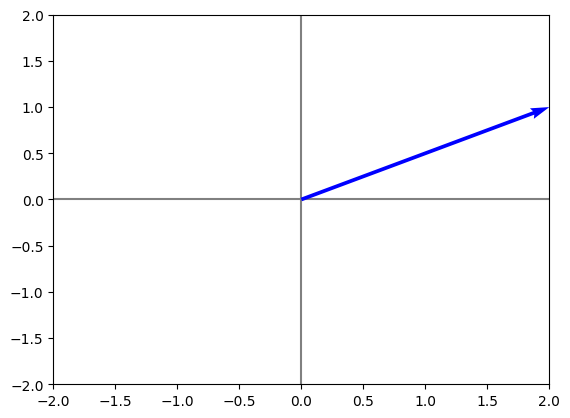

In [ ]:
graficarVectores([vector.flatten()], cols='blue')
plt.xlim(-2,2)
plt.ylim(-2,2)

Ahora, se le puede hacer una transformacion lineal al vector al aplicarle una operacion. Y esto lo vamos a mostrar a traves de una rotacion del vector con el producto punto de su matriz.

In [ ]:
A.dot(vector)

array([[1],
       [2]])

[0 0 2 1]
[0 0 1 2]


(-2.5, 2.5)

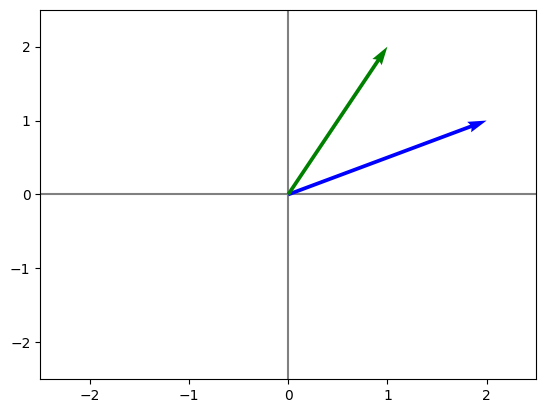

In [ ]:
graficarVectores([vector.flatten(),A.dot(vector).flatten()], cols=['blue','green'])
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

In [ ]:
print(f'Norma del vector original {np.linalg.norm(vector)} \n y norma del vector transformado {np.linalg.norm(A.dot(vector))}' )

Norma del vector original 2.23606797749979 
 y norma del vector transformado 2.23606797749979


## Eigenvector y Eigenvalor

Tambien son llamados Autovector y autovalor.

El autovector es aquel vector al que se le aplica una transformacion lineal y no sufre ninguna modificacion en su direccion, solamente en el size o amplitud del vector y en su sentido.

El autovector modifica su size al multiplicarse por el autovalor (un escalar definido como lambda).

In [ ]:
# Definir colores RGB
orange_light = ('#FF9A13')
blue_light = ('#1190FF')

# Definimos matriz
X = np.array([[3, 2],[4,1]])

# Definimos vector
v = np.array([[1],[1]])

# Definimos vector que es multiplo del vector anterior
u = X.dot(v)

[0 0 5 5]
[0 0 1 1]


(0.0, 6.0)

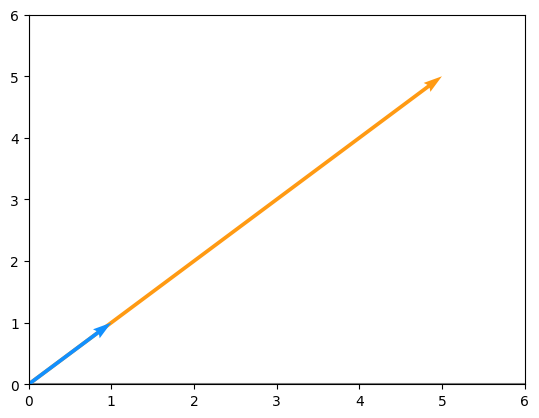

In [ ]:
# Graficar vectores
graficarVectores([u.flatten(),v.flatten()], cols=[orange_light, blue_light])
plt.xlim(0,6)
plt.ylim(0,6)

In [ ]:
lambda_1 = 5
lambda_1 * v

array([[5],
       [5]])

[ 0  0  1 -2]
[ 0  0 -1  2]


(-2.0, 2.0)

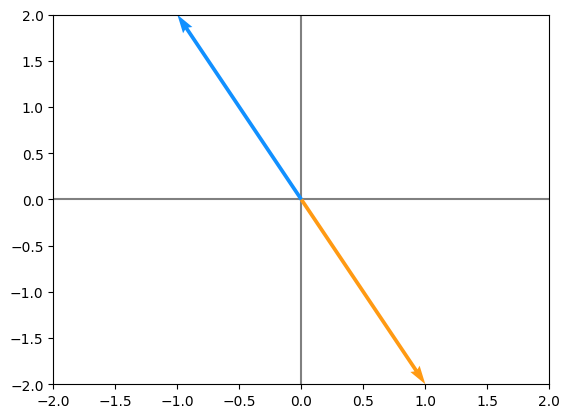

In [ ]:
# Nuevos vectores
s = np.array([[-1],[2]])
t = X.dot(s)

# Graficar vectores
graficarVectores([t.flatten(),s.flatten()], cols=[orange_light, blue_light])
plt.xlim(-2,2)
plt.ylim(-2,2)

In [ ]:
EigenValues, EigenVectors = np.linalg.eig(X)
print(EigenVectors)
print(EigenValues)

[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
[ 5. -1.]


In [ ]:
#  Eigenvector 1
EigenVectors[:,0]

array([0.70710678, 0.70710678])

In [ ]:
#  Eigenvector 2
EigenVectors[:,1]

array([-0.4472136 ,  0.89442719])

## Interpretacion de la matriz con Eagen Valores y Vectores

La matriz original A, que es cuadrada, se puede reescribir de la siguiente forma:

$A = \bigl[\begin{smallmatrix} matriz \\ eigenvectores \end{smallmatrix} \bigr] ⋅ \bigl[\begin{smallmatrix} λ_{1} & 0\\ 0 & λ_{2}\end{smallmatrix}\bigr] ⋅ \bigl[\begin{smallmatrix} matriz \\ eigenvectores \end{smallmatrix} \bigr]^{-1}$

en donde se opera a la matriz de eigenvectores producto punto la matriz diagonal de eigenvalores. El resultado de esto, se opera nuevamente con el producto punto de la matriz inversa de eigenvectores.

In [ ]:
# Calcular A a partir de Eigen valores y vectores
EigenVectors.dot(np.diag(EigenValues)).dot(np.linalg.inv(EigenVectors))

array([[3., 2.],
       [4., 1.]])

De igual forma, si la matriz es simetrica, entonces podemos jugar con la propiedad de $A = A^{-1}$ para evitar calcular la  matriz inversa, la cual consume muchos recursos computacionales. Entonces, A se calcula de la siguiente forma:

$A = \bigl[\begin{smallmatrix} matriz \\ eigenvectores \end{smallmatrix} \bigr] ⋅ \bigl[\begin{smallmatrix} λ_{1} & 0\\ 0 & λ_{2}\end{smallmatrix}\bigr] ⋅ \bigl[\begin{smallmatrix} matriz \\ eigenvectores \end{smallmatrix} \bigr]^{T}$

In [ ]:
# Crear matriz simetrica
A = np.array([[3,2],[2,3]])
print(A == A.T)

[[ True  True]
 [ True  True]]


In [ ]:
# Definimos eigen valores y vectores
EigenValues, EigenVectors = np.linalg.eig(A)
print(EigenVectors)
print(EigenValues)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[5. 1.]


In [ ]:
# Calcula la matriz a partir de Eigen valores y vectores
EigenVectors.dot(np.diag(EigenValues)).dot(EigenVectors.T)

array([[3., 2.],
       [2., 3.]])

# Descomposicion SVD para matrices no cuadradas

Lo que hace este metodo es descomponer la matriz en tres matrices distintas:

$A = U Σ V^{T}$

En donde $Σ$ contiene los valores singulares de la matriz, mientras que V son los eigen vectores y U son los valores unitarios.

Primero, se obtienen los eigen valores de la matriz resultante de $det(A^{T}A - λI)$. Despues, sustituimos los eigen valores en la $λ$ de la ecuacion $A^{T}A - λI$ y la resolvemos para obtener los eigenvectores (V). 

Despues aplicamos la raiz cuadrada a la matriz diagonal con nuestros eigen valores para obtener la matriz $Σ$.

Finalmente, multiplicamos la matriz A por V para obtener la matriz $UΣ$. Esta matriz se multiplica por la inversa de $Σ$ o $Σ^{-1}$ para obtener U.

Este procedimiento se basa en 2 ecuaciones fundamentales:

$A^{T}A = VΣ^{T}ΣV^{T}$

$AV = UΣ$

Algunas reglas que se deben cumplir son:

* Que $Σ$ contenga valores reales positivos, ya que se calculan a partir de una raiz cuadrada.

* Puedes calcular los vectores singulares de una matriz no simetrica.



In [ ]:
# Crear matriz A
A = np.array([[3, 2],[4,1]])

# Calcular eigen valores y vectores de A transpuesta por A
EigenValues, EigenVectors = np.linalg.eig(np.dot(A.T, A))

print(f'Eigen Valores \n{EigenValues}\n')
print(f'Eigen Vectores \n{EigenVectors}\n')

# Calcular el valor de U a partir CV por Sigma^-1
U_calculada = A.dot(EigenVectors).dot(np.linalg.inv(np.diag(EigenValues**0.5)))

# Impresion de las matrices con vectores singulares
print(f'U \n{U_calculada}\n')
print(f'Sigma \n{np.diag(EigenValues**0.5)}\n')
print(f'V \n{EigenVectors.T}\n')

# Comprobacion de matriz original A
U_calculada.dot(np.diag(EigenValues**0.5)).dot(EigenVectors.T)

Eigen Valores 
[29.14213562  0.85786438]

Eigen Vectores 
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]

U 
[[ 0.65520174  0.75545395]
 [ 0.75545395 -0.65520174]]

Sigma 
[[5.39834564 0.        ]
 [0.         0.92620968]]

V 
[[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]



array([[3., 2.],
       [4., 1.]])

La funcion **`np.linalg.svd()`** devuelve los valores singulares de una matriz, en el orden $U,Σ$ y $V$. La matriz V ya viene transpuesta, por lo tanto no debe sufrir modificacion.

In [ ]:
# Funcion para devolver matrices con valores singulares
U, Sigma, V = np.linalg.svd(A)

# Impresion de las matrices con vectores singulares
print(f'U \n{U}\n')
print(f'Sigma \n{np.diag(Sigma)}\n')
print(f'V \n{V}\n')

# Comprobacion de la matriz A
U.dot(np.diag(Sigma)).dot(V)

U 
[[-0.65520174 -0.75545395]
 [-0.75545395  0.65520174]]

Sigma 
[[5.39834564 0.        ]
 [0.         0.92620968]]

V 
[[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]]



array([[3., 2.],
       [4., 1.]])

# Transformaciones lineales al circulo unitario

In [ ]:
# Matriz singular
s = np.array([[1,0],[0,1]])

# Crear matriz A
A = np.array([[3, 7],[5,2]])

[0 0 1 0]
[0 0 0 1]


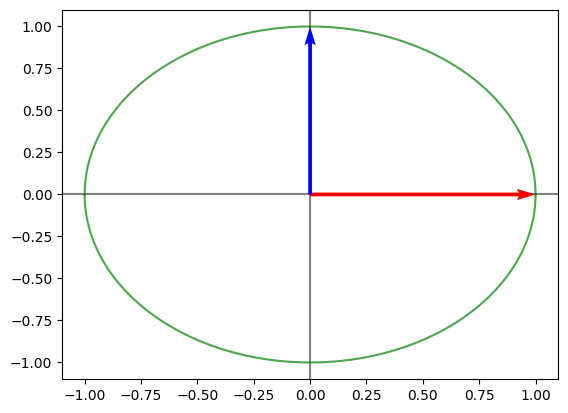

In [ ]:
graficarMatriz(s)

[0 0 3 5]
[0 0 7 2]


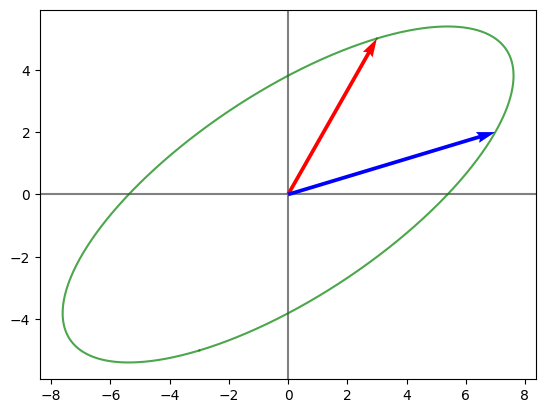

In [ ]:
graficarMatriz(A)

## Transformaciones del circulo unitario con Descomposicion SVD


Rotacion U
[ 0.          0.         -0.85065081 -0.52573111]
[ 0.          0.         -0.52573111  0.85065081]


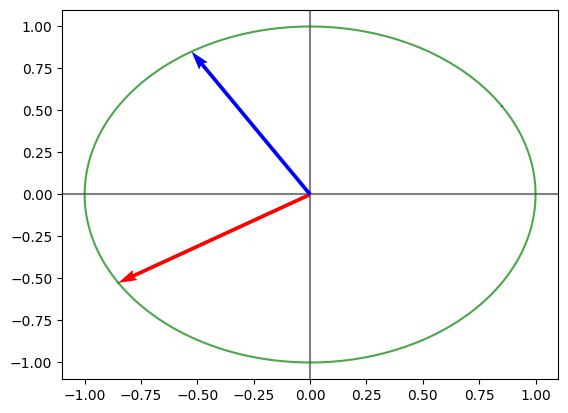

Uso de Sigma
[0.         0.         8.71337969 0.        ]
[0.         0.         0.         3.32821489]


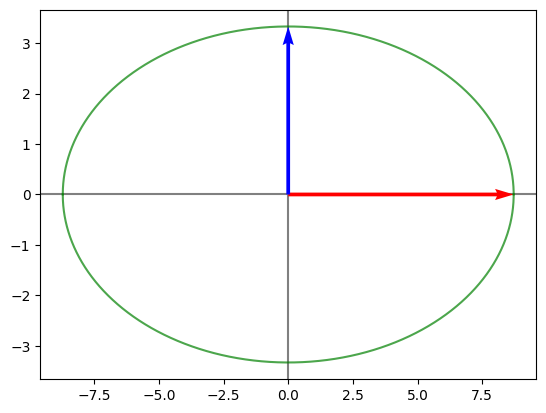

Rotacion e inversion con V
[ 0.          0.         -0.59455781  0.80405286]
[ 0.          0.         -0.80405286 -0.59455781]


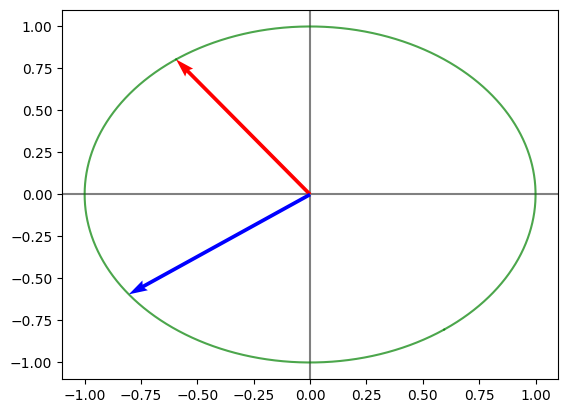

Escalamiento con Sigma
[ 0.          0.         -5.18060799  2.67606071]
[ 0.          0.         -7.00601788 -1.97881617]


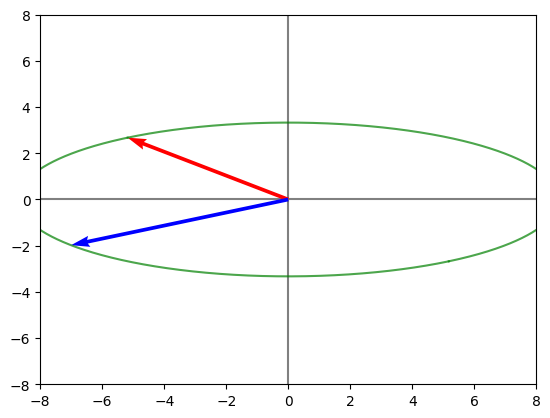

Volvemos a la transformacion de A
[0. 0. 3. 5.]
[0. 0. 7. 2.]


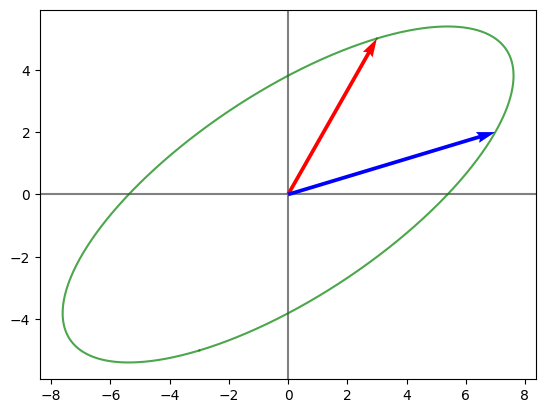

In [ ]:
U, S, V = np.linalg.svd(A)

# U rota el espacio
print('Rotacion U')
graficarMatriz(U)
plt.show()

# Lo regresa a los valores unitarios
print('Uso de Sigma')
graficarMatriz(np.diag(S))
plt.show()

# V invierte los vectores y los rota
print('Rotacion e inversion con V')
graficarMatriz(V)
plt.show()

# Escalamiento con Sigma producto punto V. Comprime un eje y alarga otro
print('Escalamiento con Sigma')
graficarMatriz(np.diag(S).dot(V))
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.show()

# Cancelamos rotacion al crear A nuevamente
print('Volvemos a la transformacion de A')
graficarMatriz(U.dot(np.diag(S)).dot(V))
plt.show()

## Que hace cada Matriz con vectores singulares

In [ ]:
A = np.array([[3, 7],[5,2]])
U, S, V = np.linalg.svd(A)

In [ ]:
# Checamos las transformaciones de los vectores con U
u1 = [ S[0] * U[0,0], S[0] * U[0,1] ] 
v1 = [ S[1] * U[1,0], S[1] * U[1,1] ] 

print(f'Vector original \n{A[0,:]}\nVector modificad \n{u1}\n')
print(f'Vector original \n{A[1,:]}\nVector modificad \n{v1}\n')

Vector original 
[3 7]
Vector modificad 
[-7.4120434792975685, -4.580894796297923]

Vector original 
[5 2]
Vector modificad 
[-1.7497461132982814, 2.8311486829996433]



[0 0 3 5]
[0 0 7 2]
[ 0.          0.         -7.41204348 -4.5808948 ]
[ 0.          0.         -1.74974611  2.83114868]


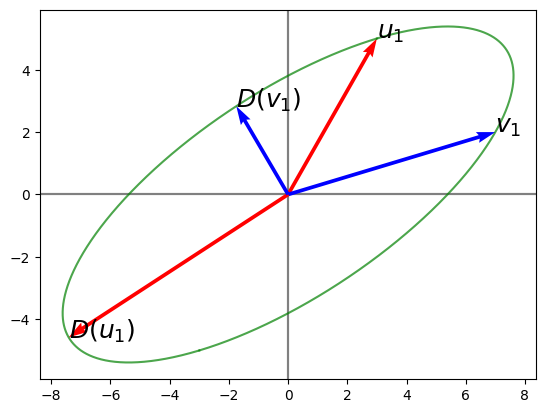

In [ ]:
# Graficar vectores originales y modificados
graficarMatriz(A)
graficarVectores([u1,v1], cols = ['red', 'blue'])

# Colocar etiquetas de texto a los vectores
plt.text( 3, 5, r"$u_1$", size = 18)
plt.text( 7, 2, r"$v_1$", size = 18)
plt.text(  -7.4, -4.6, r"$D(u_1)$", size = 18)
plt.text( -1.75, 2.8, r"$D(v_1)$", size = 18)

plt.show()

# Aplicacion de matrices en imagenes


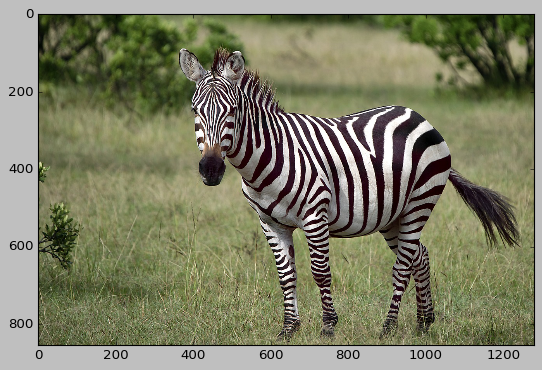

In [ ]:
# Usa estilo clasico
plt.style.use('classic')

# Guardar la imagen y la muestras en un grafo 
imagen = Image.open('imagen_zebra.jpg')
plt.imshow(imagen)

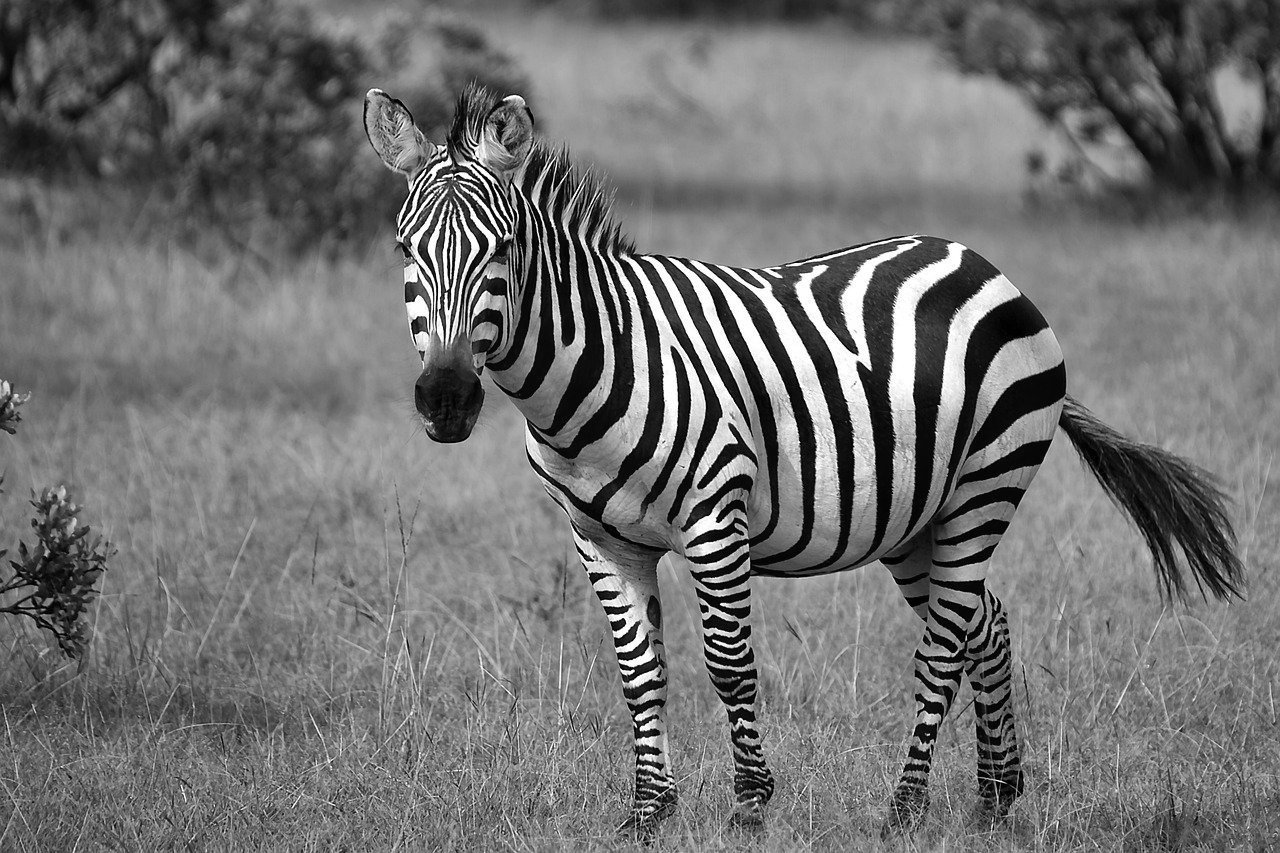

In [ ]:
# Definir escala de grises
imagen_gr = imagen.convert('LA')
imagen_gr

Obtener la matriz de la imagen para numpy

In [ ]:
# La imagen original contiene 3 escalas (RGB)
np.array(imagen).shape

(853, 1280, 3)

In [ ]:
# La imagen contiene 2 escalas (negra y gris)
np.array(imagen_gr).shape

(853, 1280, 2)

## Vector: Extraer todos los datos de la columna 0 

In [ ]:
# METODO_1: Generar arreglo de datos de la columna 0 de cada subarray
imagen_mat = np.array(list(imagen_gr.getdata(band = 0)), float)
imagen_mat

array([ 74.,  69.,  69., ..., 103., 104.,  97.])

In [ ]:
# METODO_2: Otra forma de obtener el arreglo de datos de la columna 0 de cada subarray y aplicar un reshape
np.reshape(np.array(imagen_gr)[:,:,0], (np.array(imagen_gr)[:,:,0].size,))

array([ 74,  69,  69, ..., 103, 104,  97], dtype=uint8)

## Matriz: Generar una matriz de datos con cada columna

In [ ]:
# METODO_1: Transformar el arreglo en una matriz a partir del shape de la imagen en blanco y negro original
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])
print(imagen_mat.shape)
imagen_mat

(853, 1280)


array([[ 74.,  69.,  69., ...,  57.,  59.,  62.],
       [ 74.,  68.,  65., ...,  56.,  59.,  61.],
       [ 73.,  66.,  62., ...,  55.,  57.,  59.],
       ...,
       [ 87.,  87.,  64., ..., 100.,  97., 106.],
       [ 93.,  83.,  59., ..., 107., 105.,  97.],
       [ 94.,  79.,  60., ..., 103., 104.,  97.]])

In [ ]:
# METODO_2: accedes a los datos desde Numpy
Met2Imag = np.array(imagen_gr)[:,:,0]
Met2Imag

array([[ 74,  69,  69, ...,  57,  59,  62],
       [ 74,  68,  65, ...,  56,  59,  61],
       [ 73,  66,  62, ...,  55,  57,  59],
       ...,
       [ 87,  87,  64, ..., 100,  97, 106],
       [ 93,  83,  59, ..., 107, 105,  97],
       [ 94,  79,  60, ..., 103, 104,  97]], dtype=uint8)

## Despliegue de la imagen 

Imagen Original por Metodo 1

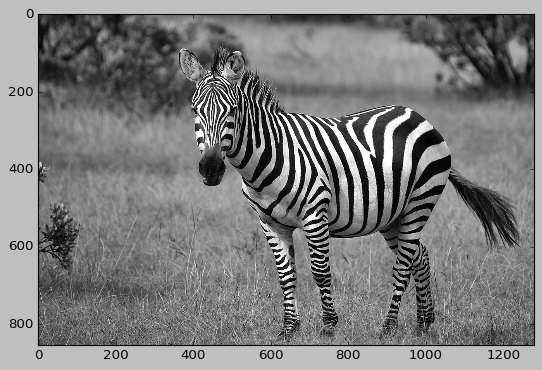

In [ ]:
plt.imshow(imagen_mat, cmap= 'gray')

Despligue de la Imagen por Metodo 2 

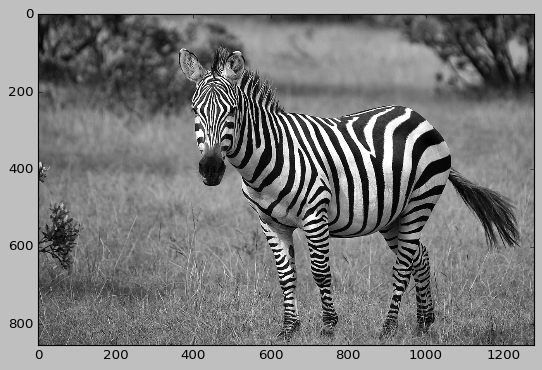

In [ ]:
plt.imshow(Met2Imag, cmap = 'gray', vmin=0, vmax=255)

## Alteracion de la Imagen por Metodo 2

### Original

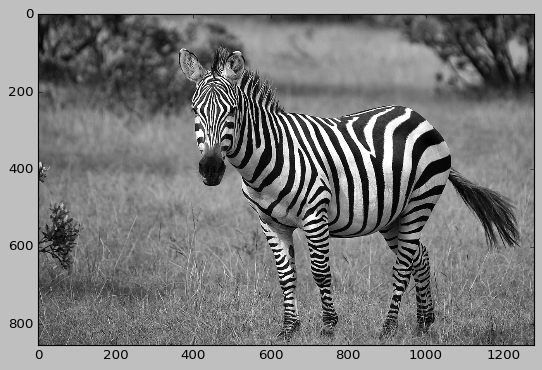

In [ ]:
plt.imshow(Met2Imag, cmap = 'gray', vmin=0, vmax=255)

### Transformada

Se le indican los valores maximos y minimos de la escala para que la transformacion sea notoria. En caso de que no se establezcan el rango de valores, la funcion `plt.imshow()` normaliza los datos que se tienen y la imagen no cambia. 

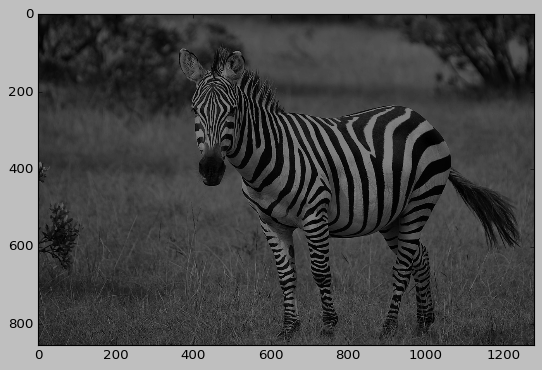

In [ ]:
plt.imshow(Met2Imag/2, cmap = 'gray', vmin=0, vmax=255)

## Imagen separada por SVD

In [ ]:
U, S, V = np.linalg.svd(imagen_mat)

print(f'Este es el shape de la matriz imagen_mat: {imagen_mat.shape}')
print(f'Este es el shape de la matriz U: {U.shape}')
print(f'Este es el shape de la matriz S: {S.shape}')
print(f'Este es el shape de la matriz V: {V.shape}')

Este es el shape de la matriz imagen_mat: (853, 1280)
Este es el shape de la matriz U: (853, 853)
Este es el shape de la matriz S: (853,)
Este es el shape de la matriz V: (1280, 1280)


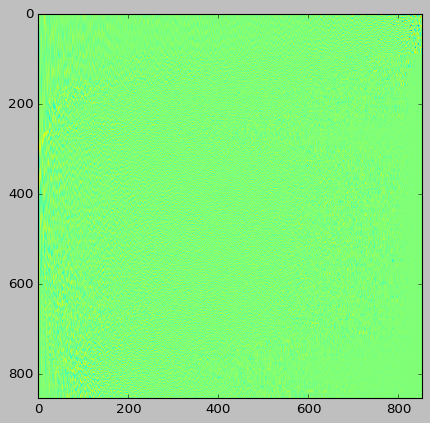

In [ ]:
# Visualizacion de U
plt.imshow(U)

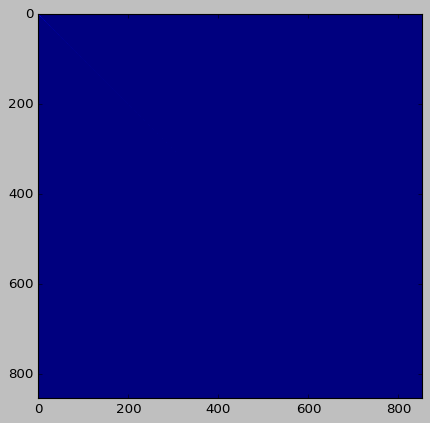

In [ ]:
# Visualizacion de S
plt.imshow(np.diag(S))

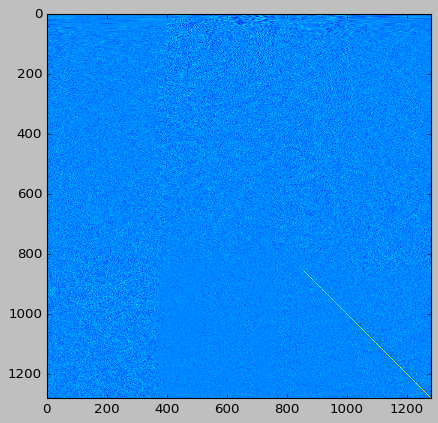

In [ ]:
# Visualizacion de V
plt.imshow(V)

Una vez que pasamos a la imagen por el metodo de USV, tenemos que recobrarla. Para esto, se tienen los siguientes pasos:

1. Escoger la primera columna del arreglo U y convertirlo en matriz.
2. Diagonalizar los datos de S y escoger la primer columna o valor
3. Escoger el primer vector de V
4. Multiplicar la columna 1 de V * el valor 1 de S * el renglon 1 de V para cumplir la condicion U * S * V.T 
5. Cambiar los valores de 1 por i dentro de la linea de codigo
6. Determinar cual es el minimo de vectores para tener cierta fidelidad en la imagen

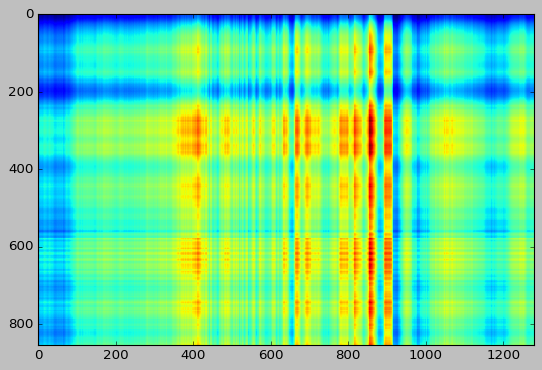

In [ ]:
# Multiplicamos la columna 1 de V * el valor 1 de S * el renglon 1 de V
imagen_recon = np.matrix(U[:,:1]) * np.diag(S[:1]) * V[:1,:]

# Obtenemos la imagen con colores inversos
plt.imshow(imagen_recon)

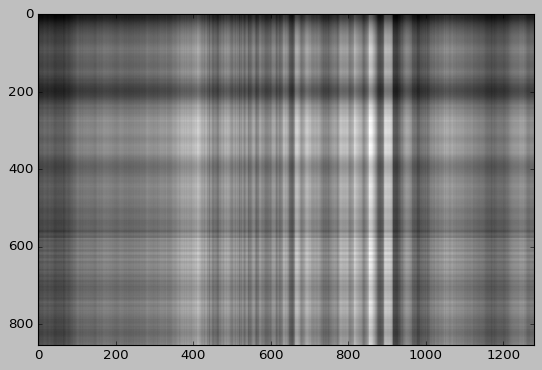

In [ ]:
plt.imshow(imagen_recon, cmap='gray')

Text(0.5, 1.0, '1 Valores Singulares')

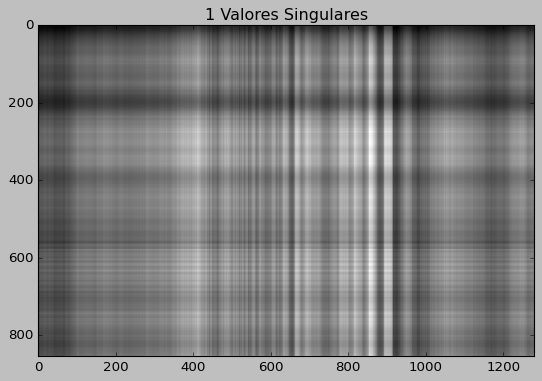

In [ ]:
i = 1
imagen_recon = np.matrix(U[:,:i]) * np.diag(S[:i]) * V[:i,:]
plt.imshow(imagen_recon, cmap = 'gray')
plt.title(f'{i} Valores Singulares')

Text(0.5, 1.0, '10 Valores Singulares')

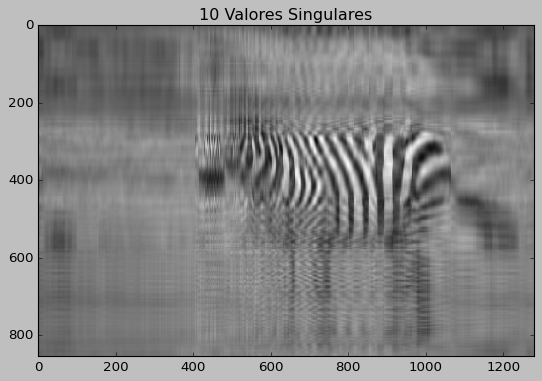

In [ ]:
i = 10
imagen_recon = np.matrix(U[:,:i]) * np.diag(S[:i]) * V[:i,:]
plt.imshow(imagen_recon, cmap = 'gray')
plt.title(f'{i} Valores Singulares')

Text(0.5, 1.0, '25 Valores Singulares')

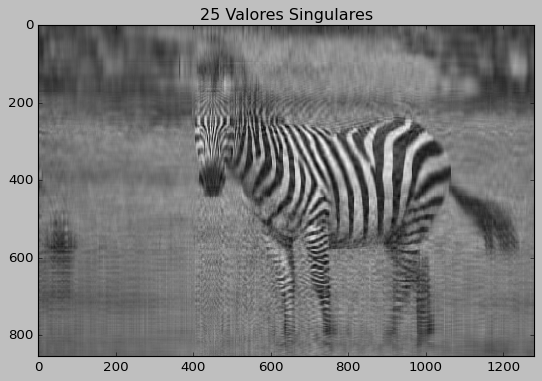

In [ ]:
i = 25
imagen_recon = np.matrix(U[:,:i]) * np.diag(S[:i]) * V[:i,:]
plt.imshow(imagen_recon, cmap = 'gray')
plt.title(f'{i} Valores Singulares')

Text(0.5, 1.0, '50 Valores Singulares')

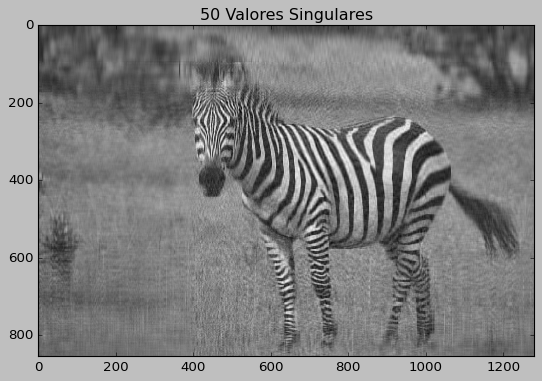

In [ ]:
i = 50
imagen_recon = np.matrix(U[:,:i]) * np.diag(S[:i]) * V[:i,:]
plt.imshow(imagen_recon, cmap = 'gray')
plt.title(f'{i} Valores Singulares')

1091840


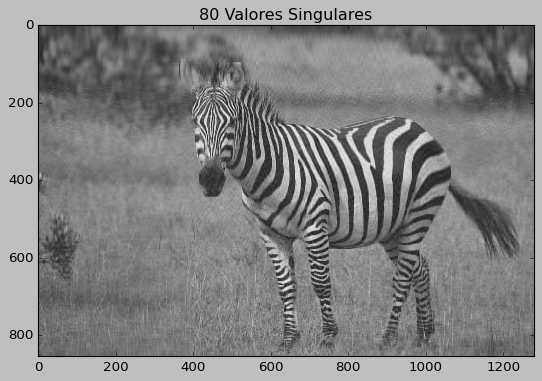

In [ ]:
i = 80
imagen_recon1 = np.matrix(U[:,:i]) * np.diag(S[:i]) * V[:i,:]
plt.imshow(imagen_recon1, cmap = 'gray')
plt.title(f'{i} Valores Singulares')
print(imagen_recon1.size)

In [ ]:
imagen_gr.size

(1280, 853)

In [ ]:
imagen_recon1[1].size

1280

# Pseudoinversa Moore Penrose

Esta es una tecnica que se utiliza para obtener una matriz pseudoinversa de una matriz que no tiene inversa.

Si A es una matriz que representa los coeficientes de una serie de ecuaciones lineales
$Ax = b$

entonces podemos tener la inversa de A siempre y cuando esta matriz pertenezca a los reales:

$ℜ \ ∃ \ A^{-1} ⇒ x = A^{-1}b $

Pero, en caso de que no exista la matriz inversa, entonces se hace uso de la pseudoinversa Moore-Penrose ($A_{pse}$), la cual se construye a partir de los valores U,S,V de la separacion de matrices singulares. $A_{pse}$ proviene de las siguientes ecuaciones:

Composicion de la matriz identidad

$A \cdot A_{pse} = I$

Composicion de la pseudoinversa Moore-Penrose 

$A_{pse} = V \cdot D_{pse} \cdot U.T$

In [ ]:
# Crear arreglo
A = np.array([[2,3],[5,7],[11,13]])

# Funcion para devolver matrices con valores singulares
U, S, V = np.linalg.svd(A)

# Impresion de las matrices con vectores singulares
print(f'U \n{U}\n')
print(f'S \n{np.diag(S)}\n')
print(f'V \n{V}\n')


U 
[[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]

S 
[[19.40321383  0.        ]
 [ 0.          0.71783924]]

V 
[[-0.63055377 -0.77614557]
 [ 0.77614557 -0.63055377]]



Para calcular la $D_{pse}$, se requiere hacer una matriz transpuesta a las dimensiones de A. La cual contendra los valores inversos de la diagonal de S o $S^{-1}$.

In [ ]:
# Generar una matriz de ceros con las dimensiones de A.T
D_pse = np.zeros((A.shape[0], A.shape[1])).T
D_pse

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# Escoges los ceros cuyo valor va a ser sustituido por los valores inversos de la diagonal de S
D_pse[:S.shape[0],:S.shape[0]]

array([[0., 0.],
       [0., 0.]])

In [ ]:
# Igualamos los valores inversos de la diagonal de S que le corresponden a D_pse
D_pse[:S.shape[0],:S.shape[0]] = np.linalg.inv(np.diag(S))
D_pse

array([[0.05153785, 0.        , 0.        ],
       [0.        , 1.39306957, 0.        ]])

Finalmente calcularemos A_{pse} a partir de la formula antes mencionada:

$A_{pse} = V \cdot D_{pse} \cdot U.T$

In [ ]:
# Ahora calcularemos A_pse. Consideramos a V.T por como estan arreglados los eigen vectores dentro de la matriz.
np.dot(V.T,D_pse).dot(U.T)

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

##  Funcion pinv()

La funcion **`np.linalg.pinv()`** hace el calculo de A pseudoinversa directamente. 

Esta pseudoinversa no es conmutativa, por lo que solo puede calcularse la identidad en 1 sentido.

In [ ]:
# Calculo unico de pseudo inversa
A_pse = np.linalg.pinv(A)
A_pse

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

In [ ]:
# Corrobora la propiedad de la identidad 
I = np.dot(A_pse, A)
I

array([[ 1.00000000e+00, -1.77635684e-15],
       [ 4.44089210e-16,  1.00000000e+00]])

In [ ]:
# Suprimimos decimales para "redondear" pero no se redondea para calculos, por lo que puede dar errores muy altos.
np.set_printoptions(suppress = True)
I

array([[ 1., -0.],
       [ 0.,  1.]])

De igual forma se puede calcular otra matriz pseudoinversa con el siguiente metodo, pero es menos certera computacionalmente. 

In [ ]:
np.linalg.inv(A.T.dot(A)).dot(A.T)

array([[-0.50515464, -0.78865979,  0.54123711],
       [ 0.42268041,  0.67010309, -0.3814433 ]])

# Calculo de pseudoinversa para resolucion de sistemas de ecuaciones

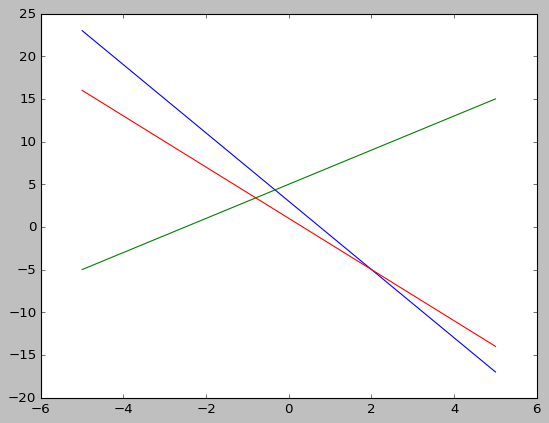

In [ ]:
# Datos en x
x = np.linspace(-5,5, 1000)

# Sistema de 3 ecuaciones
y_1 = -4* x + 3
y_2 = 2* x + 5
y_3 = -3* x + 1

# Crear grafico
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

# Mostrar grafico
plt.show()

Este sistema no tiene solucion por lo que usaremos la matriz $A_{pse}$ para aproximarnos a un punto en el espacio que las pueda conjuntar.

In [ ]:
# Arreglo de ecuaciones
matriz = np.array([[4,1],[-2,1],[3,1]])

# Calcula matriz pseudoinversa
A_pse = np.linalg.pinv(matriz)
A_pse

array([[ 0.11290323, -0.17741935,  0.06451613],
       [ 0.14516129,  0.62903226,  0.22580645]])

In [ ]:
# Demostracion de identidad
np.dot(A_pse, matriz)

array([[ 1.,  0.],
       [-0.,  1.]])

In [ ]:
# Definimos b
b = np.array([3,5,1])

# Calculamos la solucion con b producto punto A_pse
x1, y1 = np.dot(A_pse, b)

Se demuestra una solucion aproximada al sistema de ecuaciones

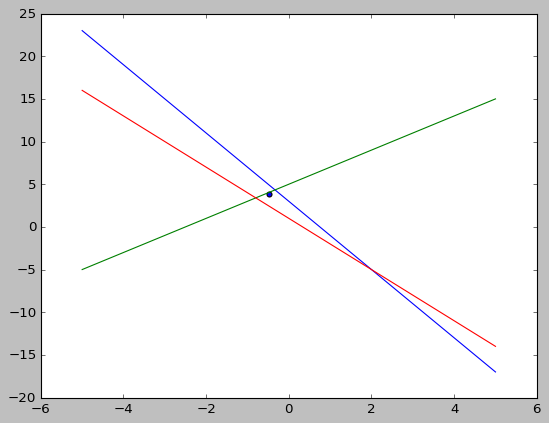

In [ ]:
# Crear grafico
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

# Graficamos punto
plt.scatter(x1,y1)

# Mostrar grafico
plt.show()


# Analisis de Componentes Principales (PCA)

Es una tecnica que utiliza los eigen vectores y valores para determinar cuales variables contienen la mayor cantidad de informacion. Esto nos ayuda porque recolectamos los datos que nos brindan mas informacion y eliminamos el resto para optimizar el modelo.

Ademas, resuelve la maldición de la dimensión. Esta dice que por cada variable que agrego en el conjunto de datos vamos a necesitar exponencialmente más muestras para poder tener la misma relevancia estadística. Por lo tanto reducimos de forma exponencial la muestra que necesitamos.

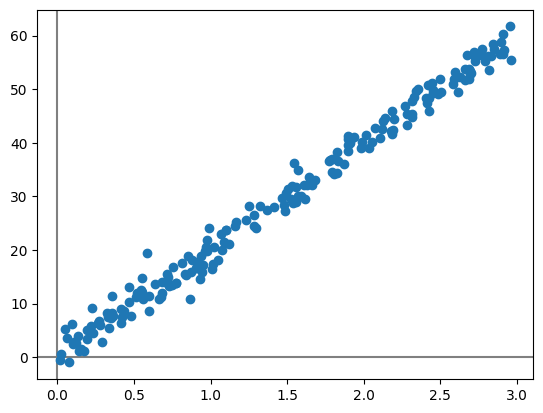

In [ ]:
# Definimos semilla
np.random.seed(42)

# Definimos ecuaciones x,y con valores aleatorios 
x = 3 * np.random.rand(200)
y = 20 * x + 2*np.random.randn(200)

# Les hacemos reshape
x = x.reshape(200,1)
y = y.reshape(200,1)

# Hacemos un stack o zip de 2 datos
xy = np.hstack([x,y])
xy.shape

# Graficar los valores de x, y
plt.scatter(xy[:,0] , xy[:,1])

# Remarcan los ejes
plt.axvline(x = 0, color= 'grey', zorder = 0)
plt.axhline(y = 0, color= 'grey', zorder = 0)

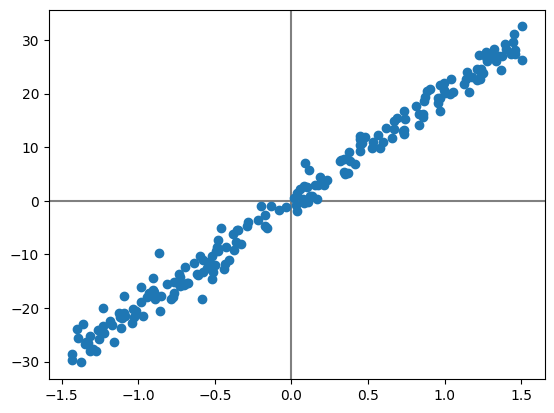

In [ ]:

# Centrar el grafico en los ejes x,y
xy_centrado = xy - np.mean(xy, axis = 0)

# Graficar los valores centrados de x, y
plt.scatter(xy_centrado[:,0] , xy_centrado[:,1])

# Remarcan los ejes
plt.axvline(x = 0, color= 'grey', zorder = 0)
plt.axhline(y = 0, color= 'grey', zorder = 0)

Una vez que los datos estan centrados, debemos calcular los eigen vectores y valores de los datos xy producto punto consigo mismo. 

Esto nos dira visualmente cuales son los vectores que contienen mayor informacion (mayor informacion = $max(λ)$)

In [ ]:
# Calculo de eigen valores y vectores
eigenvalues, eigenvectors = np.linalg.eig(np.dot(xy_centrado.T, xy_centrado))

print(f'Estos son los eigen valores \n{eigenvalues}\n')
print(f'Estos son los eigen vectores \n{eigenvectors.T}\n')

Estos son los eigen valores 
[1.85050946e+00 6.28759594e+04]

Estos son los eigen vectores 
[[-0.9987754   0.04947417]
 [-0.04947417 -0.9987754 ]]



[6.28759594e+04 1.85050946e+00]
[[-0.04947417 -0.9987754 ]
 [-0.9987754   0.04947417]]
[ 0.          0.         -0.24737086 -4.99387702]
[ 0.          0.         -4.99387702  0.24737086]


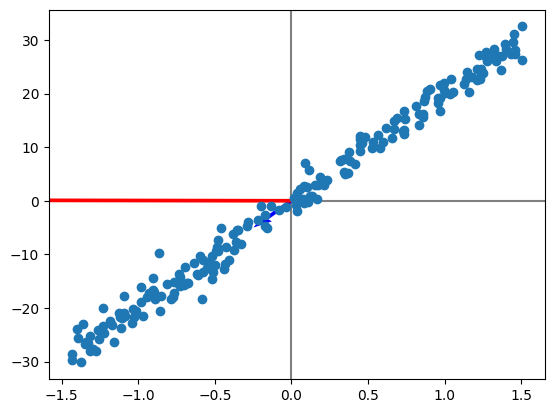

In [ ]:
# Separacion por SVD

U, S, V = np.linalg.svd(np.dot(xy_centrado.T, xy_centrado))

print(S)
print(V)

# Graficar eigenvectores amplificados, ya que no los estamos rotando
graficarVectores(V*5, ['blue','red'])

# Graficar puntos
plt.scatter(xy_centrado[:,0] , xy_centrado[:,1])

Aqui se demuestra que la lambda dominante es la del valor de y. Tanto por ser mayor como por tener la direccion mas similar a todo el arreglo de puntos.

[ 0.          0.         -4.99387702  0.24737086]
[ 0.          0.         -0.24737086 -4.99387702]


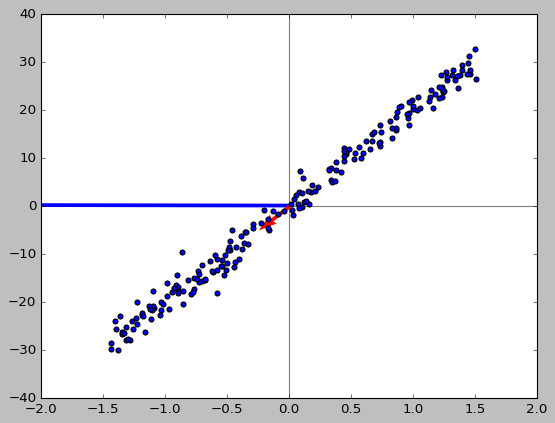

In [ ]:
# Graficar eigenvectores amplificados, ya que no los estamos rotando
graficarVectores(eigenvectors.T*5, ['blue','red'])

# Graficar puntos
plt.scatter(xy_centrado[:,0] , xy_centrado[:,1])

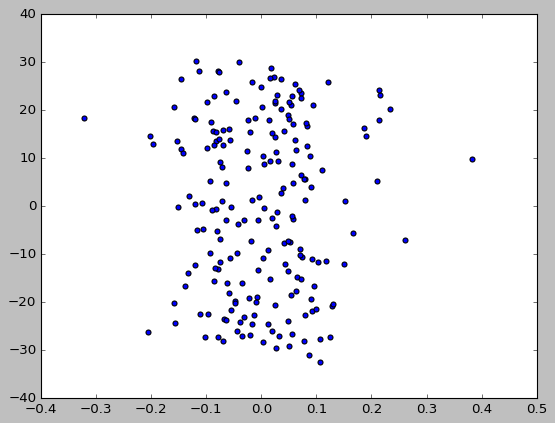

In [ ]:
# Haces producto punto de los eigenvectores con los datos centrados para conjuntarlos
xy_nuevo = np.dot(eigenvectors.T,xy_centrado.T)

# Graficar puntos transformados para capturar solo la variable Y
plt.scatter(xy_nuevo[0,:] , xy_nuevo[1, :])

# PCA en Caras

In [ ]:
# Descargamos el dataset ya normalizado
data= sklearn.datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


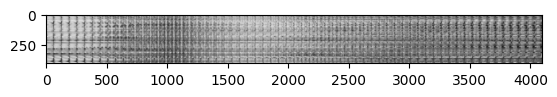

In [ ]:
# Son muchisimas imagenes normalizadas 
plt.imshow(data['data'], cmap = 'gray')

In [ ]:
# Cada fila es una cara diferente y todas las columnas son los arrays de pixeles en flatten
data.data.shape

(400, 4096)

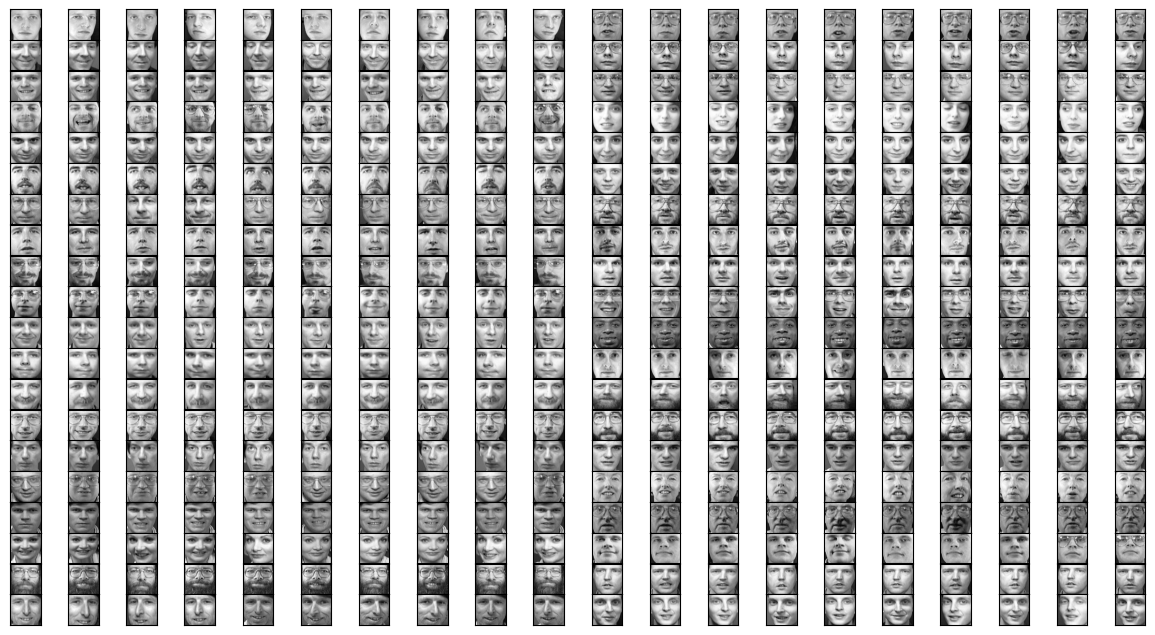

In [ ]:
# Creamos una figura con su eje, el cual tendra 20 filas y 20 columnas con imagenes
fig, axes = plt.subplots(20, 20, figsize=(15,8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

# Hacerle un reshape a cada array de pixeles de 64x64 y colocarle la imagen a cada axes
for i, ax in enumerate(axes.flat):
    ax.imshow(data.data[i].reshape(64,64), cmap = "gray")

## Aplicacion de PCA

In [ ]:
# Hace reshape de todas las imagenes y las guarda en una lista
lista_caras = [x.reshape(64,64) for x in data.data]

# Conviertes la lista en un array
caras = np.array(lista_caras)

El objeto `PCA()` recibe por argumento a `n_components`, al cual  le indicamos la fraccion de datos que queremos guardar de las imagenes. Este objeto factorizara las matrices y recobrara las imagenes necesarias para procesar esa cantidad de datos. Entonces, si:

```
caras_pca = PCA(n_components= 0.5)
```

tenemos que la tecnica PCA se quedara con las imagenes y vectores necesarios para interpretar el 50% de los datos. Un buen % seria el 90 o 95%, ya que da buenos resultados y puede ocupara poca mas del 25% de los arreglos.

**fit()** se usa para ingresar la data en el objeto, el cual debe recibir arreglos matriciales con subarreglos flatten, ya que solo puede recibir datos 2D, no 3D.

In [ ]:
from sklearn.decomposition import PCA

# Activar la tecnica de PCA 
caras_pca = PCA(n_components= 0.95)

# Hacerle fit con los datos 2D
caras_pca.fit(data.data)

PCA(n_components=0.95)

In [ ]:
# Esta metodo nos devuelve el numero de datos necesarios para interpretar todas las imagenes
caras_pca.n_components_

123

Vamos a mostrar las imagenes necesarias para traer un cierto % de la informacion a partir del PCA

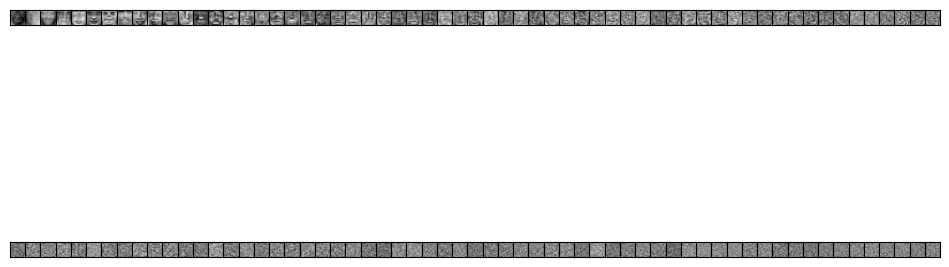

In [ ]:
# Definimos las filas
filas = 2

# Las columnas son dependientes de las filas
columnas = caras_pca.n_components_ // filas

# Creamos una figura que contiene los componentes del PCA
fig, axes = plt.subplots(filas, columnas, figsize=(12,6),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

# Hacerle un reshape a cada array de pixeles de 64x64 y colocarle la imagen a cada axes
for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(64,64), cmap = "gray")

Ahora, el metodo de PCA transformara (`.transform()`) y reinterpretara los datos a traves de la transformada inversa  (`.inverse_transform()`). Esto lo puede hacer ya que el objeto contiene los `n_components_`, las matrices mas relevantes para reinterpretar los datos. 

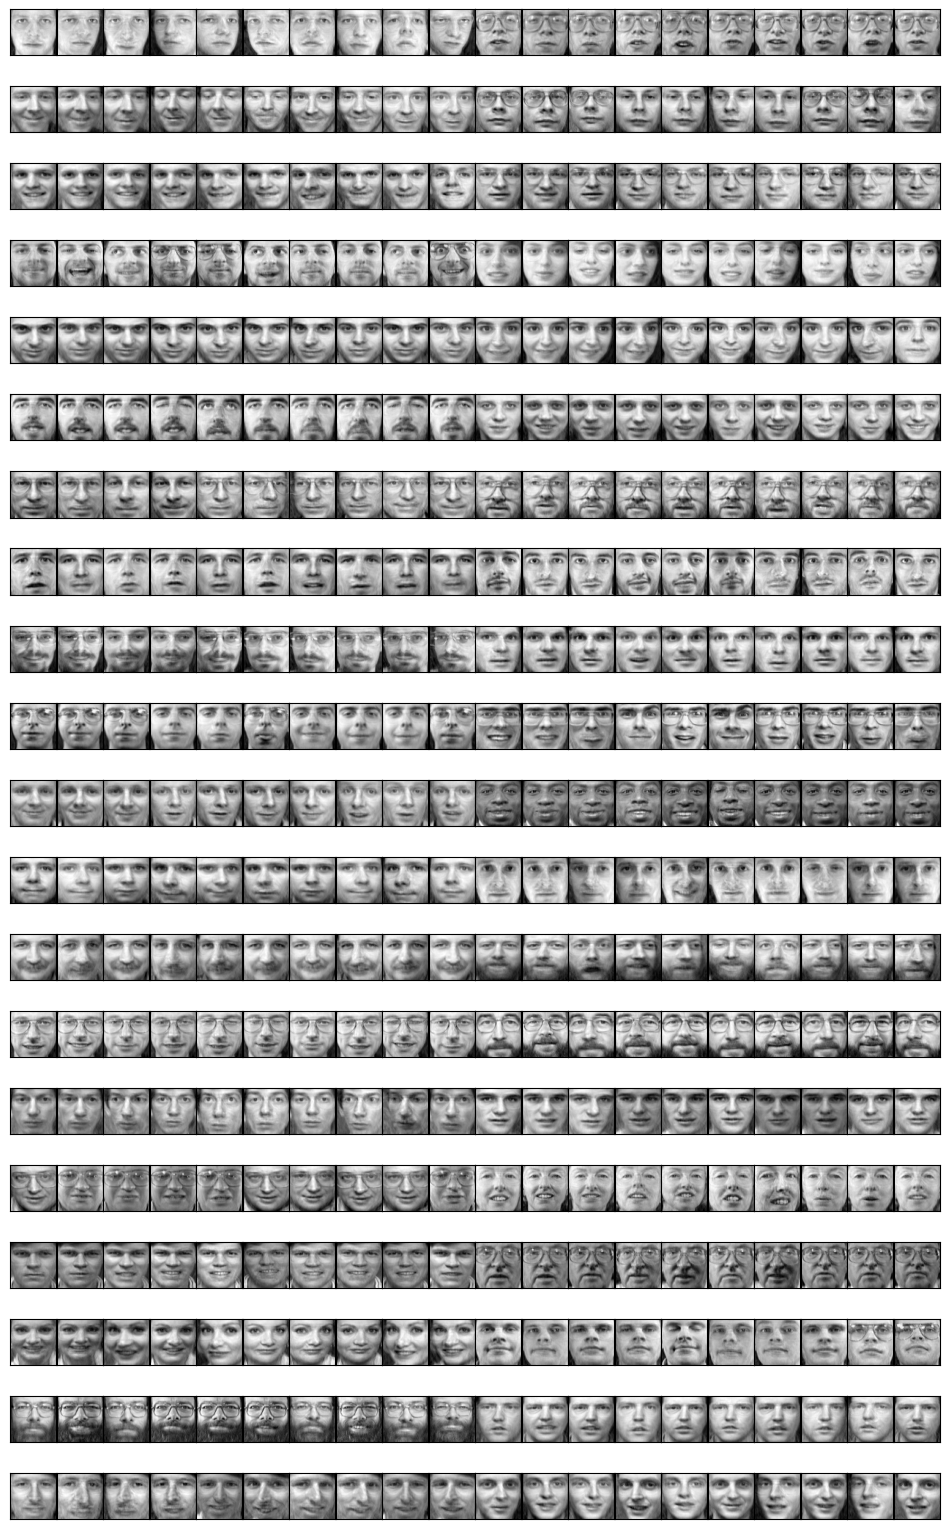

In [ ]:
# Transformacion por PCA
componentes = caras_pca.transform(data.data) 

# Proyeccion por transformacion inversa
proyeccion = caras_pca.inverse_transform(componentes)

# Reinterpretacion de las proyecciones como imagen
fig, axes = plt.subplots(20, 20, figsize=(12,20),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

# Hacerle un reshape a cada array de pixeles de 64x64 y colocarle la imagen a cada axes
for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(64,64), cmap = "gray")

# Pruebas

In [ ]:
np.linalg.eig(np.array([[3,4],[3,2]]))

(array([ 6., -1.]),
 array([[ 0.8       , -0.70710678],
        [ 0.6       ,  0.70710678]]))

In [ ]:
A_pse = np.linalg.pinv(np.array([[-1,1],[-2,1],[3,1]]))
b = np.array([4,5,6])
np.dot(A_pse, b)

array([0.28571429, 5.        ])

In [ ]:
np.linalg.pinv(np.array([[1,2],[3,4],[5,6]]))

array([[-1.33333333, -0.33333333,  0.66666667],
       [ 1.08333333,  0.33333333, -0.41666667]])